<a href="https://colab.research.google.com/github/DANCAR1969/programacion/blob/master/CLASIFICACION_SUPERVISADO.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.8607 - loss: 0.4787
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9534 - loss: 0.1531
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9654 - loss: 0.1113
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9712 - loss: 0.0926
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9772 - loss: 0.0753
313/313 - 1s - 2ms/step - accuracy: 0.9779 - loss: 0.0783

Precisión en el conjunto de prueba: 0.9779000282287598
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 895us/step


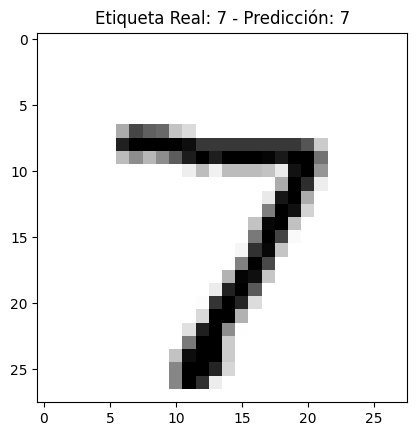

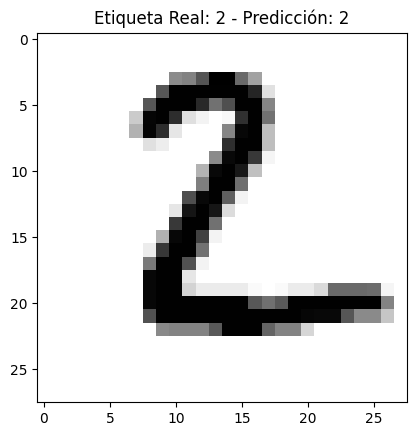

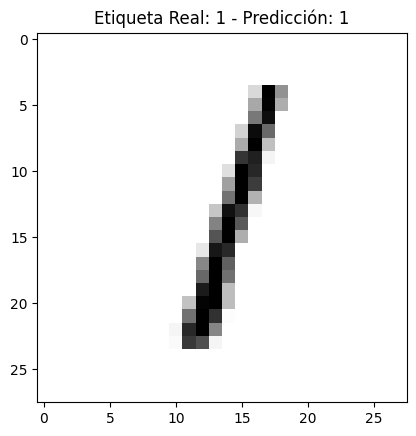

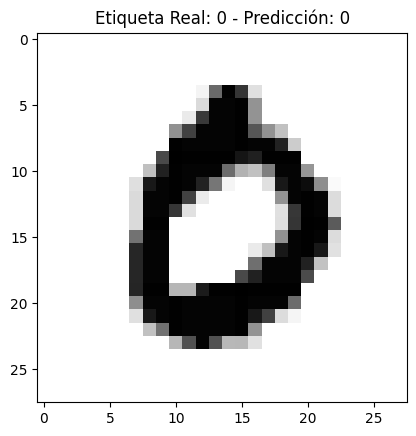

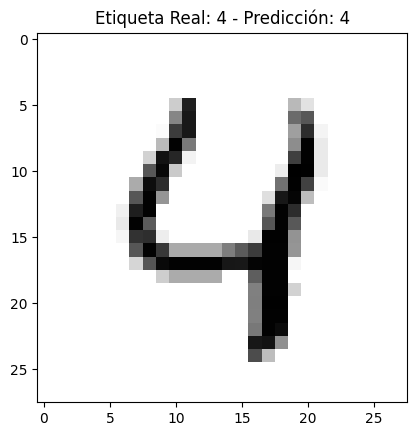

In [ ]:
# Paso 1: Importar librerías
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np

# Paso 2: Cargar el dataset de MNIST
mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Paso 3: Normalizar imágenes (convertimos a valores entre 0 y 1)
x_train, x_test = x_train / 255.0, x_test / 255.0

# Paso 4: Crear el modelo
model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),     # Aplanar la imagen 28x28 a vector 784
    tf.keras.layers.Dense(128, activation='relu'),     # Capa oculta con 128 neuronas y ReLU
    tf.keras.layers.Dropout(0.2),                      # Para evitar sobreajuste
    tf.keras.layers.Dense(10, activation='softmax')    # Capa de salida con 10 clases
])

# Paso 5: Compilar el modelo
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Paso 6: Entrenar el modelo
model.fit(x_train, y_train, epochs=5)

# Paso 7: Evaluar el modelo
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)
print('\nPrecisión en el conjunto de prueba:', test_acc)

# Paso 8: Mostrar predicciones con imágenes
predictions = model.predict(x_test)

# Visualizar 5 imágenes con sus etiquetas reales y predichas
for i in range(5):
    plt.figure()
    plt.imshow(x_test[i], cmap=plt.cm.binary)
    plt.title(f"Etiqueta Real: {y_test[i]} - Predicción: {np.argmax(predictions[i])}")
    plt.show()
